In [1]:
import numpy as np
import tensorflow as tf
import math
import h5py
import matplotlib.pyplot as plt
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.regularizers import l2
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)
K.clear_session()

Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [3]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/open_src_data/train/neg2.zip", 'r')
zip_ref.extractall("/content/train")
zip_ref = zipfile.ZipFile("/content/drive/My Drive/open_src_data/train/pos2.zip", 'r')
zip_ref.extractall("/content/train")


In [4]:
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/open_src_data/cross_valid/cross_valid_neg (2).zip", 'r')
zip_ref.extractall("/content/cross_val")
zip_ref = zipfile.ZipFile("/content/drive/My Drive/open_src_data/cross_valid/cross_valid_positive (2).zip", 'r')
zip_ref.extractall("/content/cross_val")
zip_ref.close()

In [23]:
#from keras.applications.vgg16 import VGG16
base_model=ResNet50(include_top = False, pooling = "avg")
from keras.applications.resnet import preprocess_input
model = Sequential()
model.add(base_model)

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(32, activation='relu',))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
#model.layers[0].trainable = False


94773248/94765736 [==============================] - 1s 0us/step


In [6]:
model.load_weights("/content/drive/My Drive/open_src_data/cross_valid/my_weights_vgg16.h5")

In [24]:
for layer in base_model.layers:
   layer.trainable = False


In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
model.load_weights("/content/drive/My Drive/open_src_data/cross_valid/my_weights_vgg16.h5")

In [26]:
img_width, img_height = 400,400

train_data_dir = '/content/train'
validation_data_dir = '/cross_val'
nb_train_samples = 1282
nb_validation_samples = 503
epochs = 12
batch_size = 16
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [27]:
train_datagen=ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
    channel_shift_range=150.0,
    brightness_range=(0.3, 0.9),
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		preprocessing_function=preprocess_input,
		fill_mode="nearest")


In [28]:
train_generator = train_datagen.flow_from_directory(
    "/content/train",
    target_size=(img_width, img_height),
    batch_size=batch_size,
    interpolation="bicubic",
    class_mode='binary')

Found 1988 images belonging to 2 classes.


In [29]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
valid_generator = test_datagen.flow_from_directory(
    '/content/cross_val',
    target_size=(img_width, img_height),
    interpolation="bicubic",
    batch_size=batch_size,
    class_mode='binary')

Found 350 images belonging to 2 classes.


In [30]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20
)

Epoch 1/20
124/124 [==============================] - 147s 1s/step - loss: 0.5198 - accuracy: 0.7465 - val_loss: 0.3104 - val_accuracy: 0.8690
Epoch 2/20
124/124 [==============================] - 147s 1s/step - loss: 0.3961 - accuracy: 0.8286 - val_loss: 0.2685 - val_accuracy: 0.8958
Epoch 3/20
124/124 [==============================] - 148s 1s/step - loss: 0.3523 - accuracy: 0.8494 - val_loss: 0.2632 - val_accuracy: 0.8810
Epoch 4/20
124/124 [==============================] - 149s 1s/step - loss: 0.3326 - accuracy: 0.8585 - val_loss: 0.2442 - val_accuracy: 0.8899
Epoch 5/20
124/124 [==============================] - 150s 1s/step - loss: 0.3419 - accuracy: 0.8595 - val_loss: 0.2373 - val_accuracy: 0.8839
Epoch 6/20
124/124 [==============================] - 150s 1s/step - loss: 0.3207 - accuracy: 0.8790 - val_loss: 0.2425 - val_accuracy: 0.9018
Epoch 7/20
124/124 [==============================] - 151s 1s/step - loss: 0.3293 - accuracy: 0.8631 - val_loss: 0.2553 - val_accuracy: 0.8869

In [31]:
model.save_weights("my_weights_resnet50.h5")
!mv "/content/my_weights_resnet50.h5" "/content/drive/My Drive/open_src_data/cross_valid/my_weights_resnet50.h5"

In [32]:
model.save("mymodel3_r.h5")
!mv "/content/mymodel3_r.h5" "/content/drive/My Drive/open_src_data/cross_valid/mymodel3_r.h5"

In [33]:
for layer in base_model.layers[:165]:
  layer.trainable = False
for layer in base_model.layers[165:]:
  layer.trainable= True

In [34]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [35]:
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50
)

Epoch 1/50
124/124 [==============================] - 152s 1s/step - loss: 0.3545 - accuracy: 0.8651 - val_loss: 0.7387 - val_accuracy: 0.8304
Epoch 2/50
124/124 [==============================] - 152s 1s/step - loss: 0.2699 - accuracy: 0.8981 - val_loss: 0.7954 - val_accuracy: 0.8452
Epoch 3/50
124/124 [==============================] - 151s 1s/step - loss: 0.2701 - accuracy: 0.8966 - val_loss: 0.5833 - val_accuracy: 0.9107
Epoch 4/50
124/124 [==============================] - 152s 1s/step - loss: 0.2514 - accuracy: 0.8971 - val_loss: 0.4788 - val_accuracy: 0.8571
Epoch 5/50
124/124 [==============================] - 152s 1s/step - loss: 0.2124 - accuracy: 0.9194 - val_loss: 0.5291 - val_accuracy: 0.8750
Epoch 6/50
124/124 [==============================] - 154s 1s/step - loss: 0.2186 - accuracy: 0.9184 - val_loss: 0.3253 - val_accuracy: 0.9107
Epoch 7/50
124/124 [==============================] - 154s 1s/step - loss: 0.2076 - accuracy: 0.9255 - val_loss: 0.3448 - val_accuracy: 0.9018

KeyboardInterrupt: ignored

In [36]:
model.save_weights("my_weights_resnet50_f.h5")
!mv "/content/my_weights_resnet50_f.h5" "/content/drive/My Drive/open_src_data/cross_valid/my_weights_resnet50_f.h5"

In [37]:
model.save("mymodel3_r_f.h5")
!mv "/content/mymodel3_r_f.h5" "/content/drive/My Drive/open_src_data/cross_valid/mymodel3_r_f.h5"

In [39]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


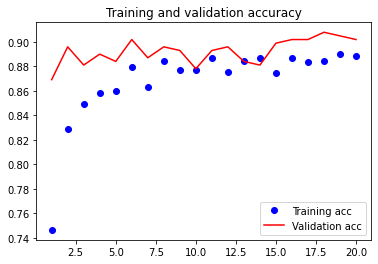

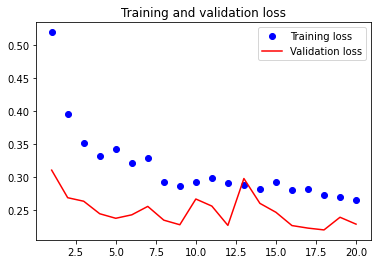

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
